# Using Healthcare Risk Factors to Predict Length of Hospital Stay
### Data manipulation and analysis on a synthetic hospital record data set
This project involves:
* Manipulation and cleaning of patient records containing noisy columns, null values, and implausible records
* Visualizing trends between medical vitals/conditions and length of hospital stay
* Comparing linear and nonlinear regression models on accuracy in predicting hospital stay
---

## Part 1: **Import necessary libraries**

In [162]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, RidgeCV, LassoCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant


## Part 2: **Cleaning the data**

### Create and explore the data frame

In [163]:
records_df = pd.read_csv('patient_records.csv')
records_df.head()

,Age,Gender,Medical Condition,Glucose,Blood Pressure,BMI,Oxygen Saturation,LengthOfStay,Cholesterol,Triglycerides,HbA1c,Smoking,Alcohol,Physical Activity,Diet Score,Family History,Stress Level,Sleep Hours,random_notes,noise_col
0,46.0,Male,Diabetes,137.04,135.27,28.90,96.04,6,231.88,210.56,7.61,0,0,-0.20,3.54,0,5.07,6.05,lorem,-137.057211
1,22.0,Male,Healthy,71.58,113.27,26.29,97.54,2,165.57,129.41,4.91,0,0,8.12,5.90,0,5.87,7.72,ipsum,-11.230610
2,50.0,NaN,Asthma,95.24,NaN,22.53,90.31,2,214.94,165.35,5.60,0,0,5.01,4.65,1,3.09,4.82,ipsum,98.331195
3,57.0,NaN,Obesity,NaN,130.53,38.47,96.60,5,197.71,182.13,6.92,0,0,3.16,3.37,0,3.01,5.33,lorem,44.187175
4,66.0,Female,Hypertension,95.15,178.17,31.12,94.90,4,259.53,115.85,5.98,0,1,3.56,3.40,0,6.38,6.64,lorem,44.831426


In [164]:
records_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                25500 non-null  float64
 1   Gender             25500 non-null  object 
 2   Medical Condition  25500 non-null  object 
 3   Glucose            25500 non-null  float64
 4   Blood Pressure     25500 non-null  float64
 5   BMI                30000 non-null  float64
 6   Oxygen Saturation  30000 non-null  float64
 7   LengthOfStay       30000 non-null  int64  
 8   Cholesterol        30000 non-null  float64
 9   Triglycerides      30000 non-null  float64
 10  HbA1c              30000 non-null  float64
 11  Smoking            30000 non-null  int64  
 12  Alcohol            30000 non-null  int64  
 13  Physical Activity  30000 non-null  float64
 14  Diet Score         30000 non-null  float64
 15  Family History     30000 non-null  int64  
 16  Stress Level       300

In [165]:
records_df.describe()

,Age,Glucose,Blood Pressure,BMI,Oxygen Saturation,LengthOfStay,Cholesterol,Triglycerides,HbA1c,Smoking,Alcohol,Physical Activity,Diet Score,Family History,Stress Level,Sleep Hours,noise_col
count,25500.000000,25500.000000,25500.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,54.616784,123.622179,140.455337,28.476155,94.954992,4.414133,213.033891,176.837375,6.294377,0.279767,0.238533,3.803214,4.029654,0.439433,5.917312,6.229836,-0.517010
std,15.973618,41.576943,21.077933,5.728804,3.736202,2.761536,33.519757,48.812827,1.320269,0.448892,0.426194,2.011729,1.817165,0.496326,2.225057,1.187669,100.076959
min,10.000000,20.320000,74.240000,7.670000,67.510000,1.000000,95.730000,-22.480000,3.280000,0.000000,0.000000,-3.680000,-1.750000,0.000000,-2.440000,1.590000,-412.169596
25%,45.000000,96.280000,125.140000,24.590000,93.000000,3.000000,189.500000,141.280000,5.330000,0.000000,0.000000,2.350000,2.770000,0.000000,4.370000,5.410000,-68.270749
50%,55.000000,110.500000,138.320000,28.050000,95.300000,4.000000,211.835000,173.365000,5.970000,0.000000,0.000000,3.590000,3.790000,0.000000,5.900000,6.230000,-0.510742
75%,66.000000,136.610000,153.790000,31.810000,97.380000,5.000000,235.310000,208.630000,6.920000,1.000000,0.000000,5.060000,5.020000,1.000000,7.440000,7.050000,66.811399
max,89.000000,318.510000,226.380000,56.850000,110.070000,19.000000,358.370000,421.510000,12.360000,1.000000,1.000000,12.410000,12.060000,1.000000,15.450000,10.350000,467.894910


In [166]:
print(records_df["Gender"].value_counts())
print(records_df["Medical Condition"].value_counts())

Gender
Female    12865
Male      12635
Name: count, dtype: int64
Medical Condition
Hypertension    7120
Diabetes        6417
Obesity         3857
Healthy         3039
Asthma          2037
Arthritis       1796
Cancer          1234
Name: count, dtype: int64


Descriptive statistics and value counts of original dataset can be compared to cleaned dataset to ensure integrity of data spreads after cleansing procedures.

### Drop unnecessary/"noisy" columns

In [167]:
records_df = records_df.drop(columns=['random_notes', 'noise_col'])
records_df.head()

,Age,Gender,Medical Condition,Glucose,Blood Pressure,BMI,Oxygen Saturation,LengthOfStay,Cholesterol,Triglycerides,HbA1c,Smoking,Alcohol,Physical Activity,Diet Score,Family History,Stress Level,Sleep Hours
0,46.0,Male,Diabetes,137.04,135.27,28.90,96.04,6,231.88,210.56,7.61,0,0,-0.20,3.54,0,5.07,6.05
1,22.0,Male,Healthy,71.58,113.27,26.29,97.54,2,165.57,129.41,4.91,0,0,8.12,5.90,0,5.87,7.72
2,50.0,NaN,Asthma,95.24,NaN,22.53,90.31,2,214.94,165.35,5.60,0,0,5.01,4.65,1,3.09,4.82
3,57.0,NaN,Obesity,NaN,130.53,38.47,96.60,5,197.71,182.13,6.92,0,0,3.16,3.37,0,3.01,5.33
4,66.0,Female,Hypertension,95.15,178.17,31.12,94.90,4,259.53,115.85,5.98,0,1,3.56,3.40,0,6.38,6.64


Columns "random_notes" and "noise_col" offer no analytical value and were dropped.

### Remove records containing NaN

In [168]:
updated_records_df = records_df.dropna()
print(f"Original records: {len(records_df)}, After dropping NaNs: {len(updated_records_df)}")
print(len(records_df) - len(updated_records_df), "records removed due to NaN values.")

Original records: 30000, After dropping NaNs: 13355
16645 records removed due to NaN values.


### Standardize column names

In [169]:
# Convert column names to consistent format
updated_records_df.columns = (
    updated_records_df.columns
    .str.strip()
    .str.replace(' ', '_')
    .str.replace(r"([a-z])([A-Z])", r"\1_\2", regex=True)
    .str.lower()
)

In [170]:
# Check column names
print(list(updated_records_df.columns))

['age', 'gender', 'medical_condition', 'glucose', 'blood_pressure', 'bmi', 'oxygen_saturation', 'length_of_stay', 'cholesterol', 'triglycerides', 'hb_a1c', 'smoking', 'alcohol', 'physical_activity', 'diet_score', 'family_history', 'stress_level', 'sleep_hours']


Column names all converted to snake-case for simplicity.

### Dealing with impossible/implausible values (negatives, out of range of scale, etc.)

In [171]:
# Check ranges, max, min values of numeric columns for discrepancies
updated_records_df.describe()

,age,glucose,blood_pressure,bmi,oxygen_saturation,length_of_stay,cholesterol,triglycerides,hb_a1c,smoking,alcohol,physical_activity,diet_score,family_history,stress_level,sleep_hours
count,13355.000000,13355.000000,13355.000000,13355.000000,13355.000000,13355.000000,13355.000000,13355.000000,13355.000000,13355.000000,13355.000000,13355.000000,13355.000000,13355.000000,13355.000000,13355.000000
mean,54.621939,123.699637,140.257456,28.477885,94.920469,4.393635,212.938431,176.974248,6.297032,0.276151,0.239760,3.828392,4.041902,0.437739,5.900396,6.243131
std,15.884199,41.703479,21.085526,5.760367,3.752591,2.710919,33.738266,48.570712,1.326625,0.447109,0.426953,2.025940,1.819880,0.496127,2.214387,1.188671
min,10.000000,20.320000,74.240000,9.400000,67.510000,1.000000,95.730000,-8.140000,3.460000,0.000000,0.000000,-2.000000,-1.750000,0.000000,-2.070000,1.590000
25%,45.000000,96.240000,125.010000,24.580000,92.995000,3.000000,189.060000,141.520000,5.330000,0.000000,0.000000,2.370000,2.780000,0.000000,4.350000,5.420000
50%,55.000000,110.620000,138.110000,28.050000,95.250000,4.000000,211.680000,173.410000,5.970000,0.000000,0.000000,3.600000,3.800000,0.000000,5.870000,6.230000
75%,66.000000,137.050000,153.790000,31.810000,97.350000,5.000000,235.445000,208.420000,6.920000,1.000000,0.000000,5.100000,5.030000,1.000000,7.430000,7.080000
max,89.000000,318.510000,224.250000,52.860000,110.070000,19.000000,355.270000,421.510000,11.940000,1.000000,1.000000,12.410000,12.060000,1.000000,13.920000,10.350000


`.describe()` shows negative values and seemingly implausible values (e.g. 9.4 for `bmi`, -8.14 for `triglycerides`)

#### Establish plausible ranges for included health metrics

In [172]:
validation_rules = {
    "glucose": { # mg/dL
        "min": 30,
        "max": 1000
    },
    "blood_pressure": { # Systolic
        "min": 70,
        "max": 250
    },
    "bmi": { # Adult range, pediatric accounted for later
        "min": 10,
        "max": 60
    },
    "oxygen_saturation": { # Percentage
        "min": 50,
        "max": 100
    },
    "length_of_stay": {
        "min": 0,
        "max": 365 # assuming max stay of 1 year
    },
    "cholesterol": { # mg/dL
        "min": 50,
        "max": 1000
    },
    "triglycerides": { # mg/dL
        "min": 0,
        "max": 2000
    },
    "hba1c": { # Hemoglobin A1c, Percentage
        "min": 3,
        "max": 20
    },
    "physical_activity": { # Hours/week, negative values impossible, data suggests setting upper limit is not necessary
        "min": 0,
        "max": None
    },
    "diet_score": { # Scale unspecified, negative values implausible
        "min": 0,
        "max": None
    },
    "stress_level": { # Scale unspecified, negative values implausible
        "min": 0,
        "max": None
    }
}

The following sources were used to determine plausible ranges for certain vitals (sources listed in depth in README):
* [Low](https://www.cdc.gov/diabetes/about/low-blood-sugar-hypoglycemia.html) and [high](https://my.clevelandclinic.org/health/diseases/21945-diabetic-ketoacidosis-dka) glucose levels
* [Systolic blood pressure](https://www.heart.org/en/health-topics/high-blood-pressure/understanding-blood-pressure-readings)
* [BMI](https://eatingdisorderresources.com/what-is-the-lowest-bmi-you-can-have-without-dying/#google_vignette)
* [Oxygen Saturation](https://www.mayoclinic.org/symptoms/hypoxemia/basics/definition/sym-20050930?cjdata=MXxOfDB8WXww&cjevent=d9b55c41d88211f0833f00d00a82b824&cm_mmc=CJ-_-100357191-_-5250933-_-Evergreen+Link+for+Mayo+Clinic+Diet&utm_source=cj&utm_content=100357191&utm_capaign=3-months
)
* [Cholesterol](https://my.clevelandclinic.org/health/articles/11920-cholesterol-numbers-what-do-they-mean)
* [Triglycerides](https://my.clevelandclinic.org/health/articles/11117-triglycerides)
* [HbA1c](https://pmc.ncbi.nlm.nih.gov/articles/PMC9260736/
)

#### Create histograms to visualize record discrepancies/outliers

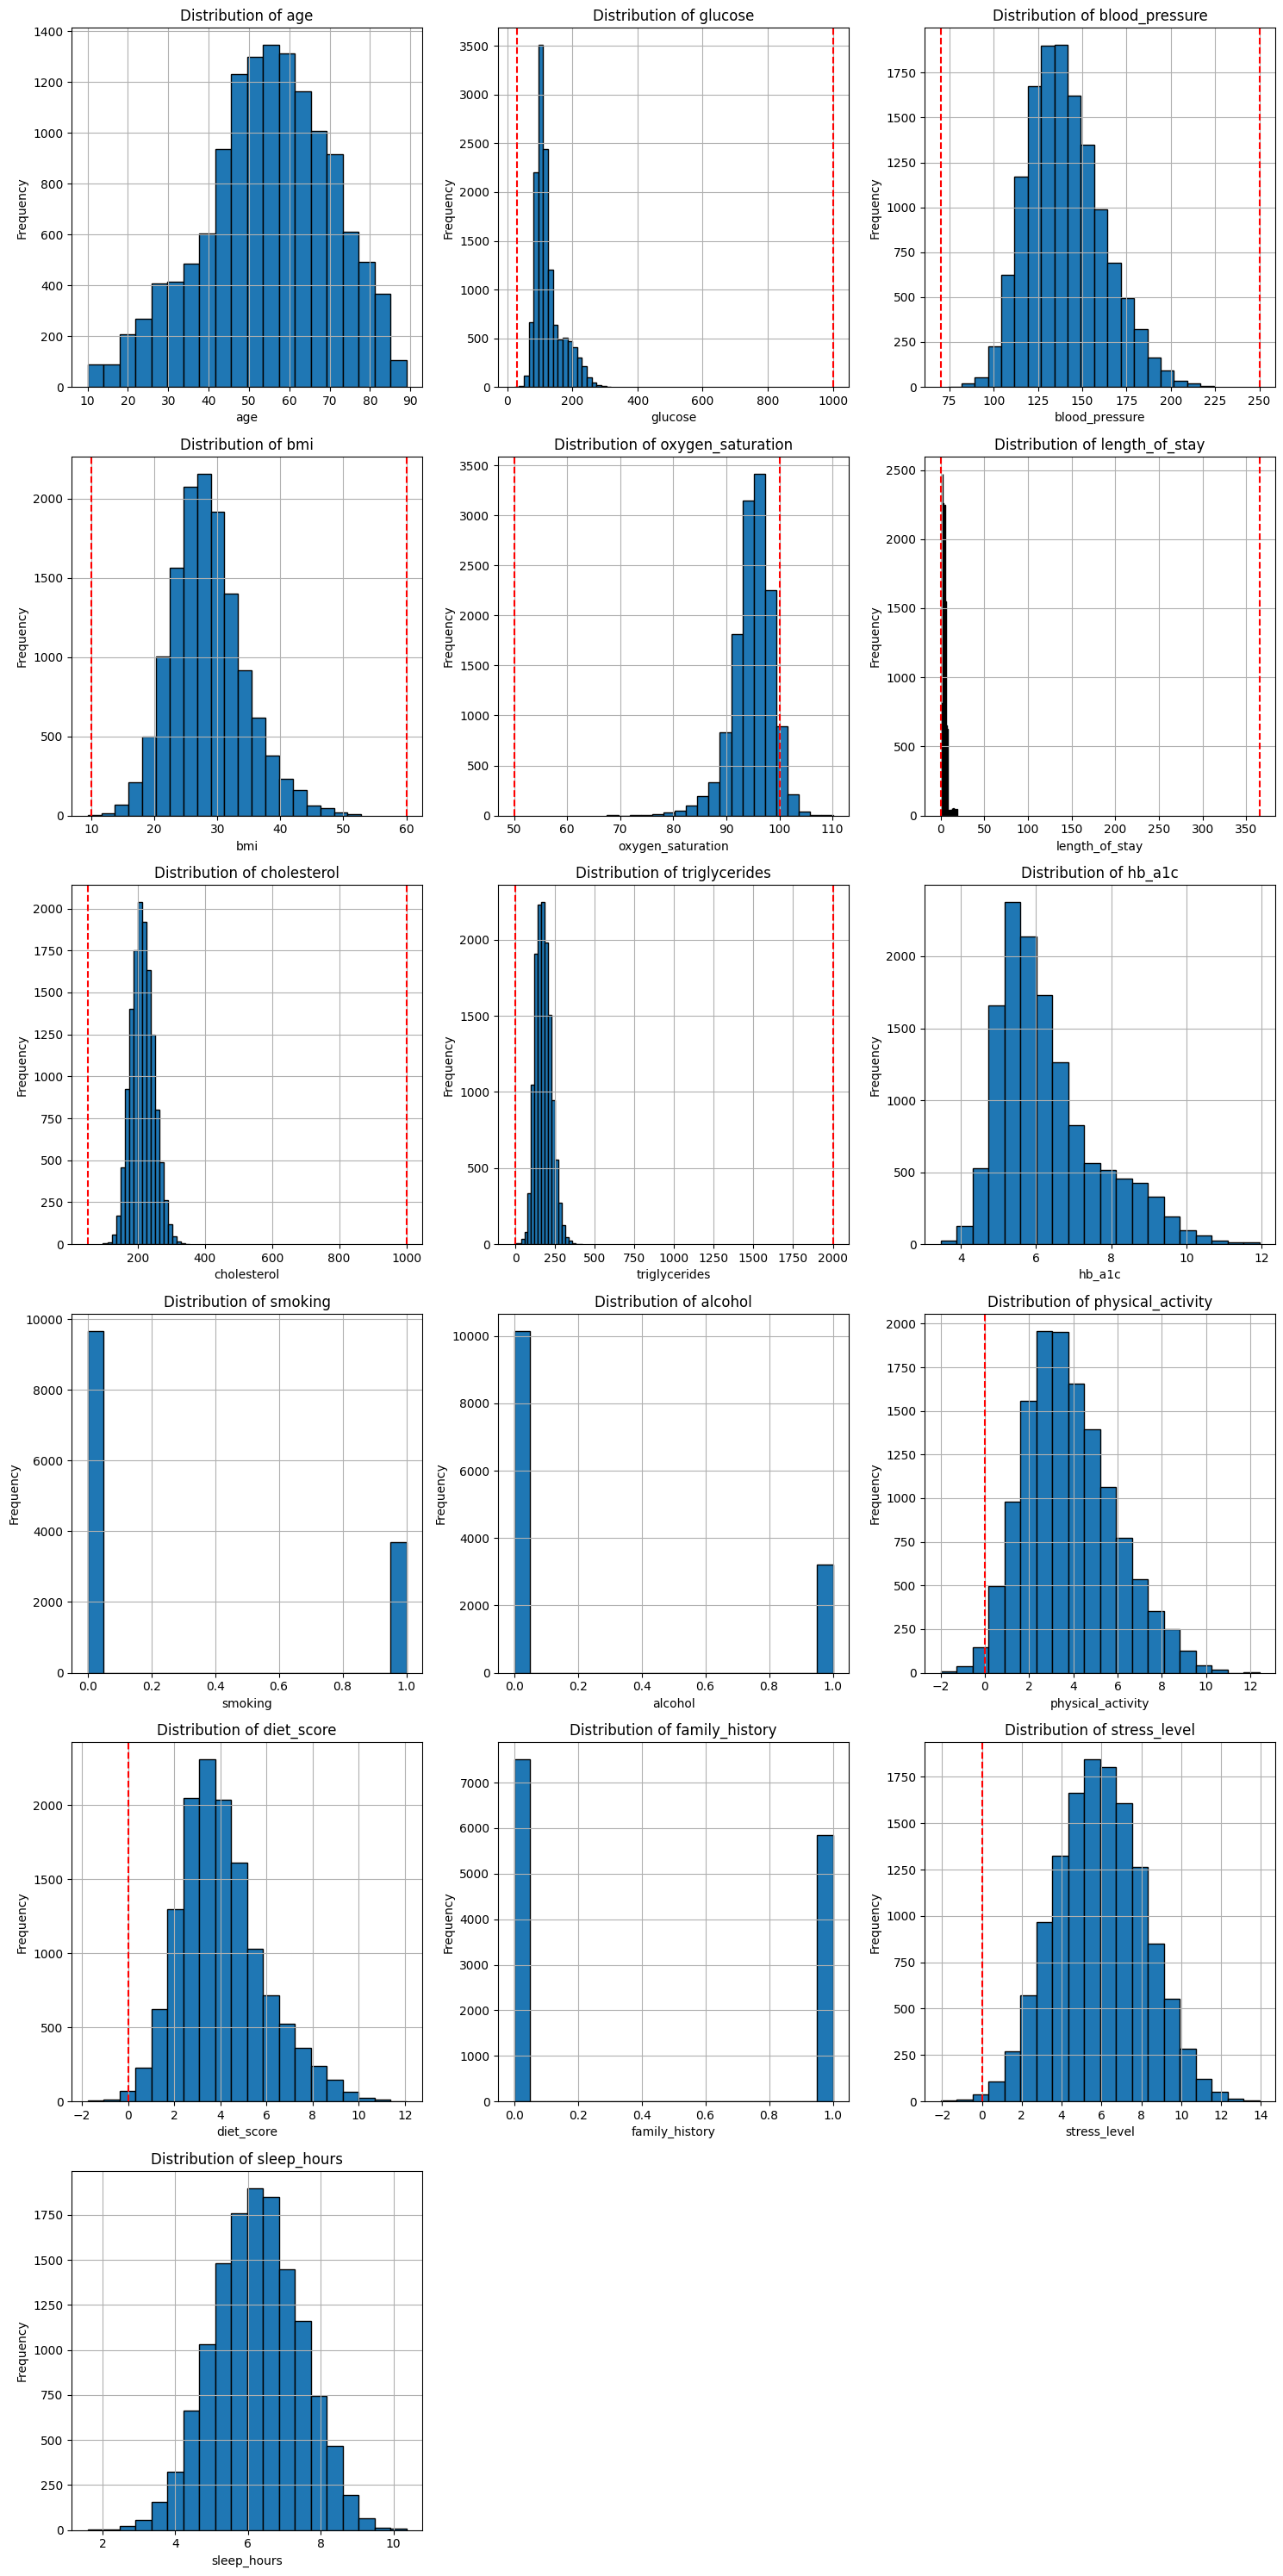

In [173]:
numeric_cols = updated_records_df.select_dtypes(include=np.number).columns
n_cols = len(numeric_cols)

n_rows = int(np.ceil(n_cols / 3)) # 3 plots per row
fig, axes = plt.subplots(n_rows, 3, figsize=(15, 5 * n_rows))
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    updated_records_df[col].hist(bins=20, edgecolor='black', ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

    # Overlay validation limits if they exist
    if col in validation_rules:
        if validation_rules[col].get("min") is not None:
            axes[i].axvline(validation_rules[col]["min"], color='red', linestyle='--')
        if validation_rules[col].get("max") is not None:
            axes[i].axvline(validation_rules[col]["max"], color='red', linestyle='--')
    
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])  # Remove unused subplots    
    
plt.tight_layout()
plt.show()

#### Define and apply validation function to updated data frame

In [174]:
# Define validation function
def validate_records(df, rules):
    for col, bounds in rules.items():
        if col in df.columns:
            if col == "bmi": # Special handling for BMI based on age
                df = df[((df['age'] >= 18) & (df[col] >= 10) & (df[col] <= 60)) |
                        ((df['age'] < 18) & (df[col] >= 10) & (df[col] <= 45))]
            else:
                if bounds.get("min") is not None:
                    df = df[df[col] >= bounds["min"]]
                if bounds.get("max") is not None:
                    df = df[df[col] <= bounds["max"]]
    return df


In [175]:
# Apply validation rules to filter out implausible records
clean_records_df = validate_records(updated_records_df, validation_rules)
print(f"Records after validation: {len(clean_records_df)}")
print(f"{len(updated_records_df) - len(clean_records_df)} records removed for validation violations.")

Records after validation: 12341
1014 records removed for validation violations.


### View cleaned data

In [176]:
clean_records_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12341 entries, 1 to 29999
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                12341 non-null  float64
 1   gender             12341 non-null  object 
 2   medical_condition  12341 non-null  object 
 3   glucose            12341 non-null  float64
 4   blood_pressure     12341 non-null  float64
 5   bmi                12341 non-null  float64
 6   oxygen_saturation  12341 non-null  float64
 7   length_of_stay     12341 non-null  int64  
 8   cholesterol        12341 non-null  float64
 9   triglycerides      12341 non-null  float64
 10  hb_a1c             12341 non-null  float64
 11  smoking            12341 non-null  int64  
 12  alcohol            12341 non-null  int64  
 13  physical_activity  12341 non-null  float64
 14  diet_score         12341 non-null  float64
 15  family_history     12341 non-null  int64  
 16  stress_level       12341 no

In [177]:
clean_records_df.head()

,age,gender,medical_condition,glucose,blood_pressure,bmi,oxygen_saturation,length_of_stay,cholesterol,triglycerides,hb_a1c,smoking,alcohol,physical_activity,diet_score,family_history,stress_level,sleep_hours
1,22.0,Male,Healthy,71.58,113.27,26.29,97.54,2,165.57,129.41,4.91,0,0,8.12,5.90,0,5.87,7.72
4,66.0,Female,Hypertension,95.15,178.17,31.12,94.90,4,259.53,115.85,5.98,0,1,3.56,3.40,0,6.38,6.64
5,50.0,Male,Hypertension,107.00,171.80,25.33,95.21,5,233.10,203.67,5.48,1,0,5.01,4.65,0,7.25,6.35
9,13.0,Female,Asthma,90.60,126.88,29.24,97.96,6,193.44,163.65,6.18,1,0,5.27,5.63,0,7.09,5.41
11,32.0,Male,Healthy,114.41,122.99,24.92,95.71,1,153.71,135.57,4.77,1,0,4.92,6.55,1,3.40,7.99


In [178]:
clean_records_df[
    ['age', 
     'glucose', 
     'blood_pressure', 
     'bmi', 
     'oxygen_saturation', 
     'length_of_stay', 
     'cholesterol', 
     'triglycerides', 
     'hb_a1c', 
     'physical_activity', 
     'diet_score', 
     'stress_level']
].describe().round(2)

,age,glucose,blood_pressure,bmi,oxygen_saturation,length_of_stay,cholesterol,triglycerides,hb_a1c,physical_activity,diet_score,stress_level
count,12341.00,12341.00,12341.00,12341.00,12341.00,12341.00,12341.00,12341.00,12341.00,12341.00,12341.00,12341.00
mean,54.71,123.61,140.31,28.41,94.50,4.39,213.01,176.74,6.29,3.89,4.07,5.92
std,15.90,41.73,21.14,5.73,3.48,2.70,33.82,48.23,1.33,1.99,1.81,2.20
min,10.00,34.35,76.34,10.31,67.51,1.00,95.73,4.00,3.46,0.00,-0.00,-0.00
25%,45.00,96.18,125.01,24.54,92.83,3.00,189.01,141.51,5.33,2.43,2.80,4.36
50%,55.00,110.56,138.12,27.98,95.00,4.00,211.66,173.03,5.96,3.64,3.82,5.89
75%,66.00,136.88,153.94,31.74,96.94,5.00,235.61,208.16,6.92,5.15,5.05,7.44
max,89.00,318.51,224.25,52.86,100.00,19.00,355.27,386.66,11.94,12.41,12.06,13.92


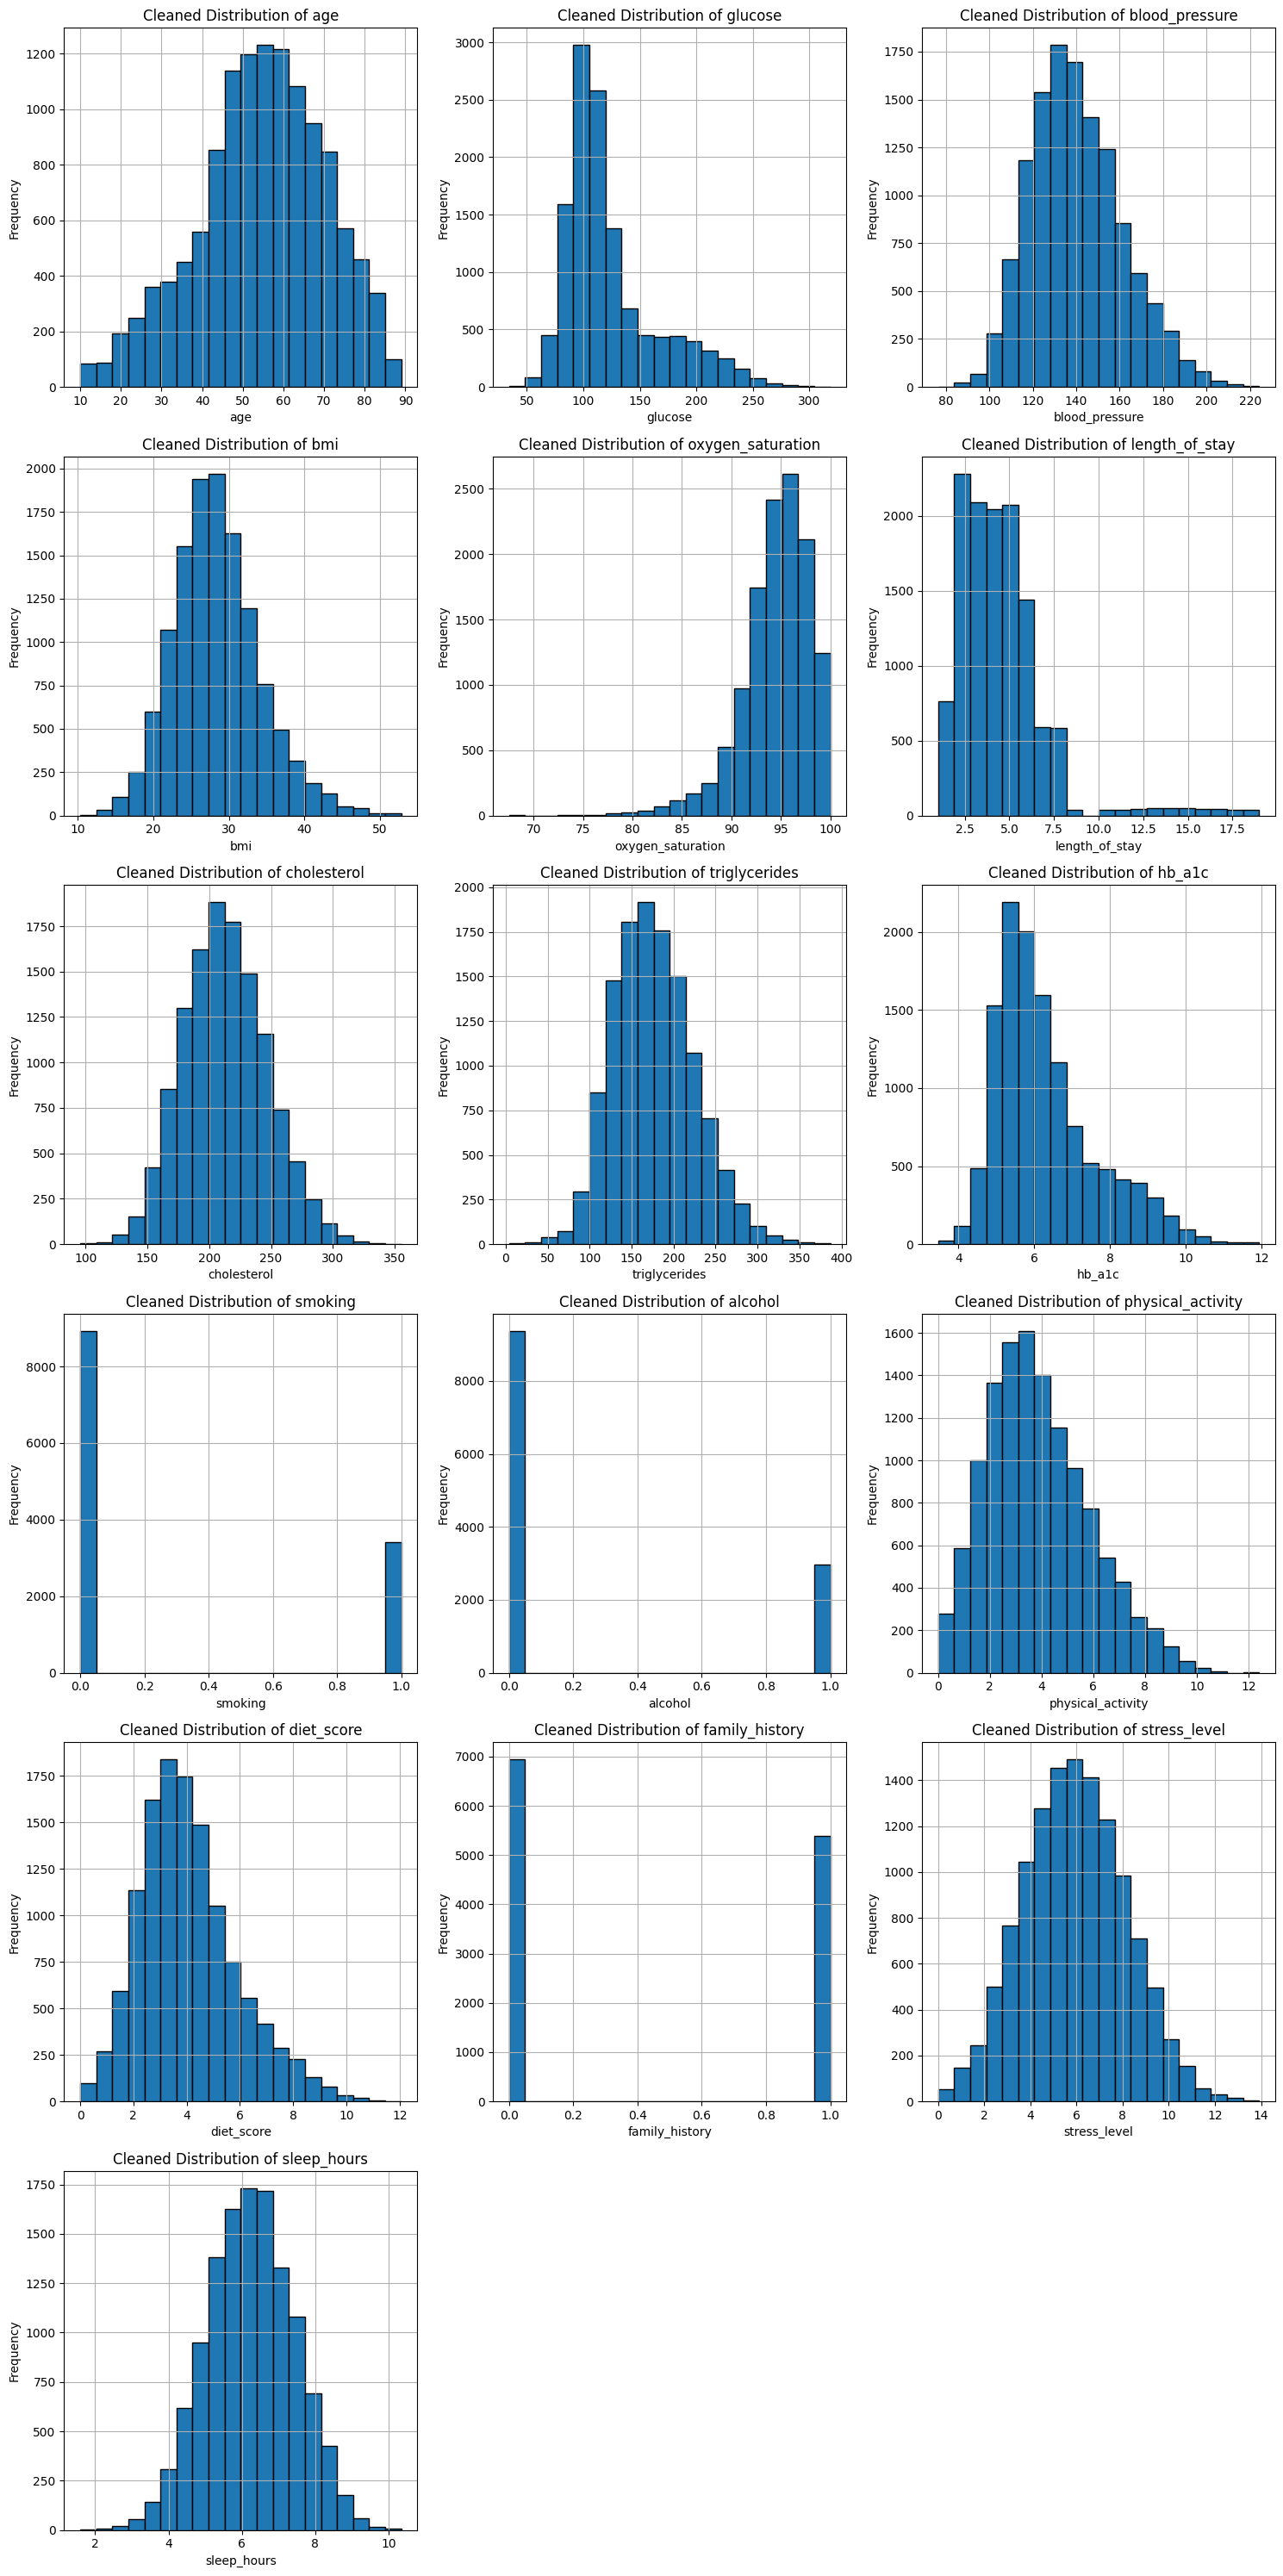

In [179]:
# Visualize cleaned data distributions for numeric columns
num_col = clean_records_df.select_dtypes(include=np.number).columns
n_col = len(num_col)
n_rows = int(np.ceil(n_col / 3))

fig, axes = plt.subplots(n_rows, 3, figsize=(15, 5 * n_rows))
axes = axes.flatten()

for i, col in enumerate(num_col):
    clean_records_df[col].hist(bins=20, edgecolor='black', ax=axes[i])
    axes[i].set_title(f'Cleaned Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])  # Remove unused subplots

plt.tight_layout()
plt.show()

### Encode categorical variables (Gender and Medical Condition)

In [180]:
# Check unique values for gender
print(clean_records_df["gender"].unique())
print("Number of unique genders: ", clean_records_df["gender"].nunique())

# Check unique values for medical condition
print(clean_records_df["medical_condition"].unique())
print("Number of unique medical conditions: ", clean_records_df["medical_condition"].nunique())

['Male' 'Female']
Number of unique genders:  2
['Healthy' 'Hypertension' 'Asthma' 'Diabetes' 'Arthritis' 'Obesity'
 'Cancer']
Number of unique medical conditions:  7


In [181]:
# View value counts for categorical columns
print(clean_records_df["gender"].value_counts())
print(clean_records_df["medical_condition"].value_counts())

gender
Female    6243
Male      6098
Name: count, dtype: int64
medical_condition
Hypertension    3535
Diabetes        3128
Obesity         1778
Healthy         1496
Asthma          1011
Arthritis        833
Cancer           560
Name: count, dtype: int64


The above step was conducted to ensure that no gender or medical conditions had value counts of 0. Comparison of value counts to original dataset confirms similar distributions of categorical variables.

In [ ]:
# Use binary encoding for gender
clean_records_df["gender_encoded"] = clean_records_df["gender"].map({"Male": 0, "Female": 1})
clean_records_df.drop(columns=["gender"], inplace=True)
print(clean_records_df["gender_encoded"].unique()) # verifies gender values are now binary

[0 1]


In [183]:
# Use one-hot encoding for medical conditions

# Ensure 'medical_condition' is categorical
clean_records_df["medical_condition"] = pd.Categorical(
    clean_records_df["medical_condition"],
    categories = [
        "Healthy", # using "Healthy" as baseline
        "Diabetes",
        "Hypertension",
        "Asthma",
        "Cancer",
        "Arthritis",
        "Obesity"
    ],
    ordered = False
)
clean_records_df = pd.get_dummies(
    clean_records_df,
    columns = ["medical_condition"],
    drop_first = True
)
clean_records_df.head()


,age,glucose,blood_pressure,bmi,oxygen_saturation,length_of_stay,cholesterol,triglycerides,hb_a1c,smoking,...,family_history,stress_level,sleep_hours,gender_encoded,medical_condition_Diabetes,medical_condition_Hypertension,medical_condition_Asthma,medical_condition_Cancer,medical_condition_Arthritis,medical_condition_Obesity
1,22.0,71.58,113.27,26.29,97.54,2,165.57,129.41,4.91,0,...,0,5.87,7.72,0,False,False,False,False,False,False
4,66.0,95.15,178.17,31.12,94.90,4,259.53,115.85,5.98,0,...,0,6.38,6.64,1,False,True,False,False,False,False
5,50.0,107.00,171.80,25.33,95.21,5,233.10,203.67,5.48,1,...,0,7.25,6.35,0,False,True,False,False,False,False
9,13.0,90.60,126.88,29.24,97.96,6,193.44,163.65,6.18,1,...,0,7.09,5.41,1,False,False,True,False,False,False
11,32.0,114.41,122.99,24.92,95.71,1,153.71,135.57,4.77,1,...,1,3.40,7.99,0,False,False,False,False,False,False


In [184]:
# Rename medical condition columns for clarity
clean_records_df.rename(
    columns = {
        "medical_condition_Diabetes": "diabetes",
        "medical_condition_Hypertension": "hypertension",
        "medical_condition_Asthma": "asthma",
        "medical_condition_Cancer": "cancer",
        "medical_condition_Arthritis": "arthritis",
        "medical_condition_Obesity": "obesity"
    }, inplace=True
)
clean_records_df.head()

,age,glucose,blood_pressure,bmi,oxygen_saturation,length_of_stay,cholesterol,triglycerides,hb_a1c,smoking,...,family_history,stress_level,sleep_hours,gender_encoded,diabetes,hypertension,asthma,cancer,arthritis,obesity
1,22.0,71.58,113.27,26.29,97.54,2,165.57,129.41,4.91,0,...,0,5.87,7.72,0,False,False,False,False,False,False
4,66.0,95.15,178.17,31.12,94.90,4,259.53,115.85,5.98,0,...,0,6.38,6.64,1,False,True,False,False,False,False
5,50.0,107.00,171.80,25.33,95.21,5,233.10,203.67,5.48,1,...,0,7.25,6.35,0,False,True,False,False,False,False
9,13.0,90.60,126.88,29.24,97.96,6,193.44,163.65,6.18,1,...,0,7.09,5.41,1,False,False,True,False,False,False
11,32.0,114.41,122.99,24.92,95.71,1,153.71,135.57,4.77,1,...,1,3.40,7.99,0,False,False,False,False,False,False


In [185]:
# Convert boolean columns (medical conditions) to binary values

# Detect boolean columns
bool_cols = clean_records_df.select_dtypes(include=[bool]).columns

clean_records_df[bool_cols] = clean_records_df[bool_cols].astype(int)
print(clean_records_df[bool_cols].head())
print(clean_records_df[bool_cols].dtypes) # Verify conversion to int

    diabetes  hypertension  asthma  cancer  arthritis  obesity
1          0             0       0       0          0        0
4          0             1       0       0          0        0
5          0             1       0       0          0        0
9          0             0       1       0          0        0
11         0             0       0       0          0        0
diabetes        int64
hypertension    int64
asthma          int64
cancer          int64
arthritis       int64
obesity         int64
dtype: object


**Final clean data frame:** 12341 entries, 23 features
* `gender_encoded` derived from original `gender` with binary encoding (0 = male, 1 = female)
* `medical_condition` expanded via one-hot encoding and reinitialized with binary encoding (0 = does not have condition, 1 = has condition)

## Part 3: **Exploratory Data Analysis**

### Create heatmap to explore potential correlations

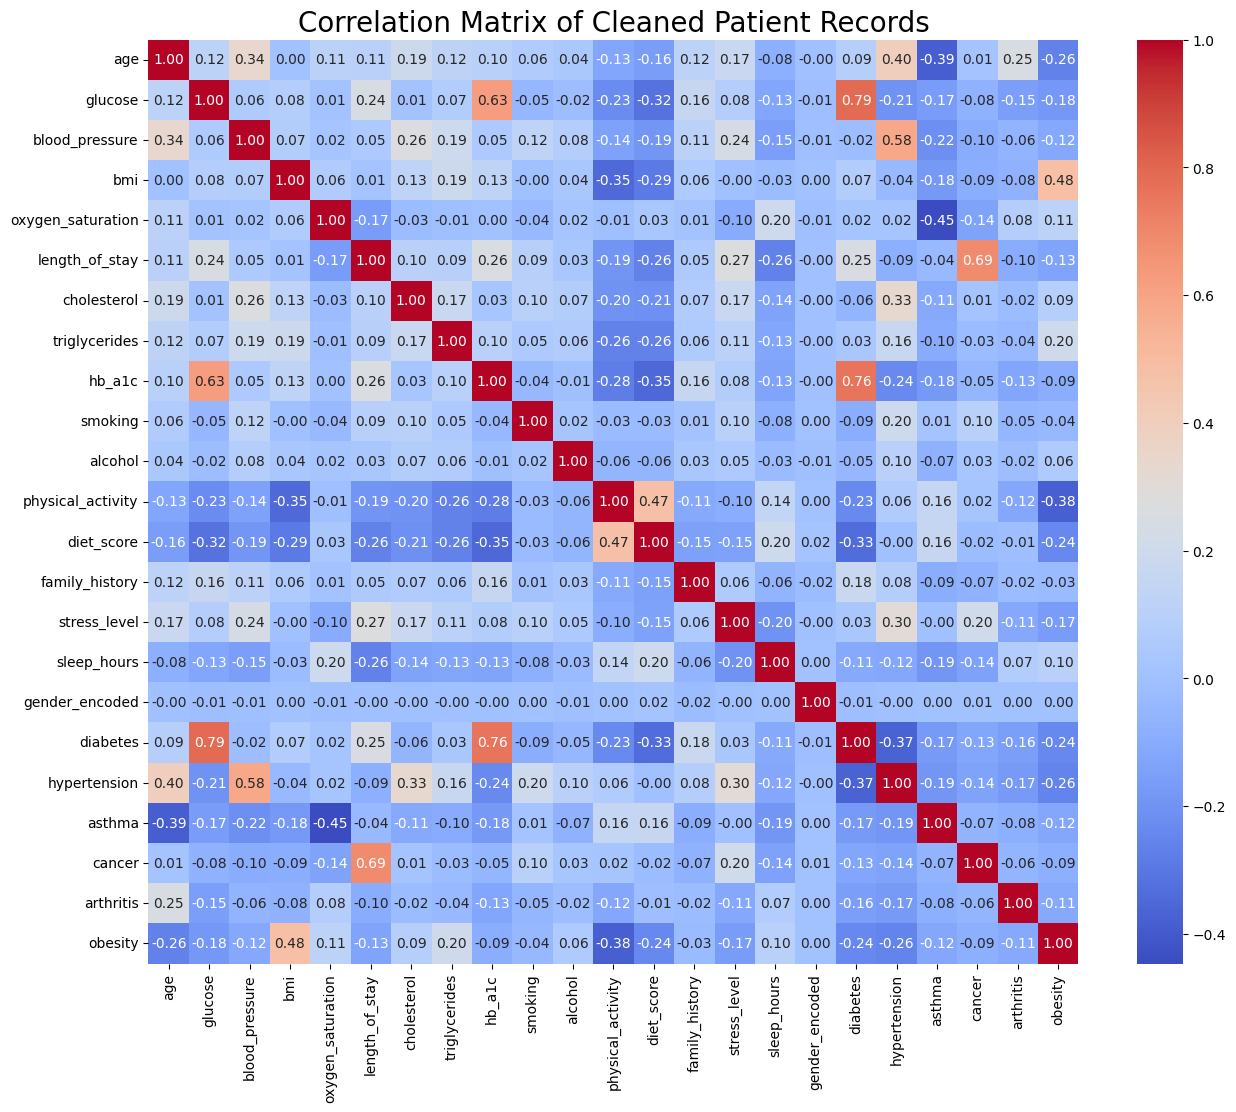

In [186]:
plt.figure(figsize=(15, 12))
sns.heatmap(
    clean_records_df.select_dtypes(include=[np.number]).corr(),
    annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix of Cleaned Patient Records", fontsize = 20)
plt.show()

### Display condensed heatmap to focus on length of stay

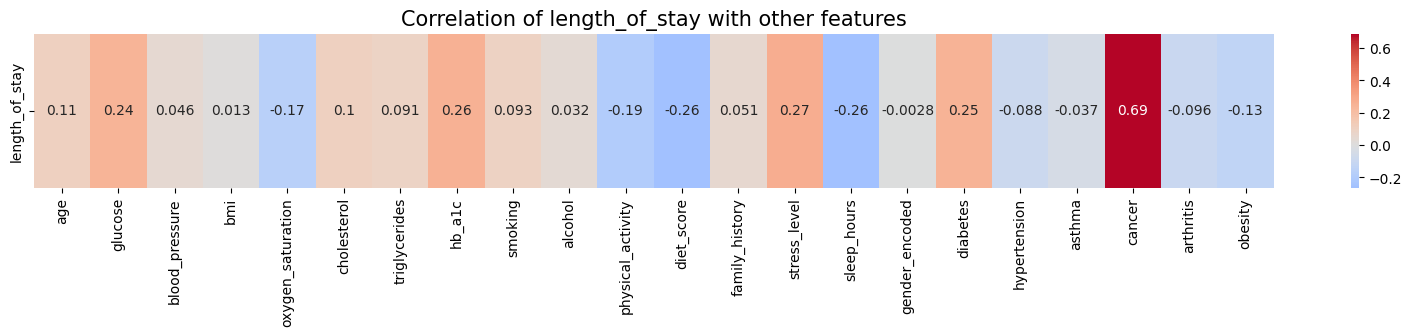

In [187]:
# Define target
target = "length_of_stay"

# Compute correlations for target
corrs = clean_records_df.corr()[target].drop(target) # drops correlation of length_of_stay against itself

# Convert correlations to data frame
corr_df = corrs.to_frame().T

# Plot heatmap
plt.figure(figsize = (20, 2))
sns.heatmap(corr_df, annot = True, cmap = "coolwarm", center = 0)
plt.title(f"Correlation of {target} with other features", fontsize = 15)
plt.show()



Based on this, `cancer` is strongest contributor, while some features are moderately correlated but not nearly as strong.

### Create scatterplots of features against length of stay

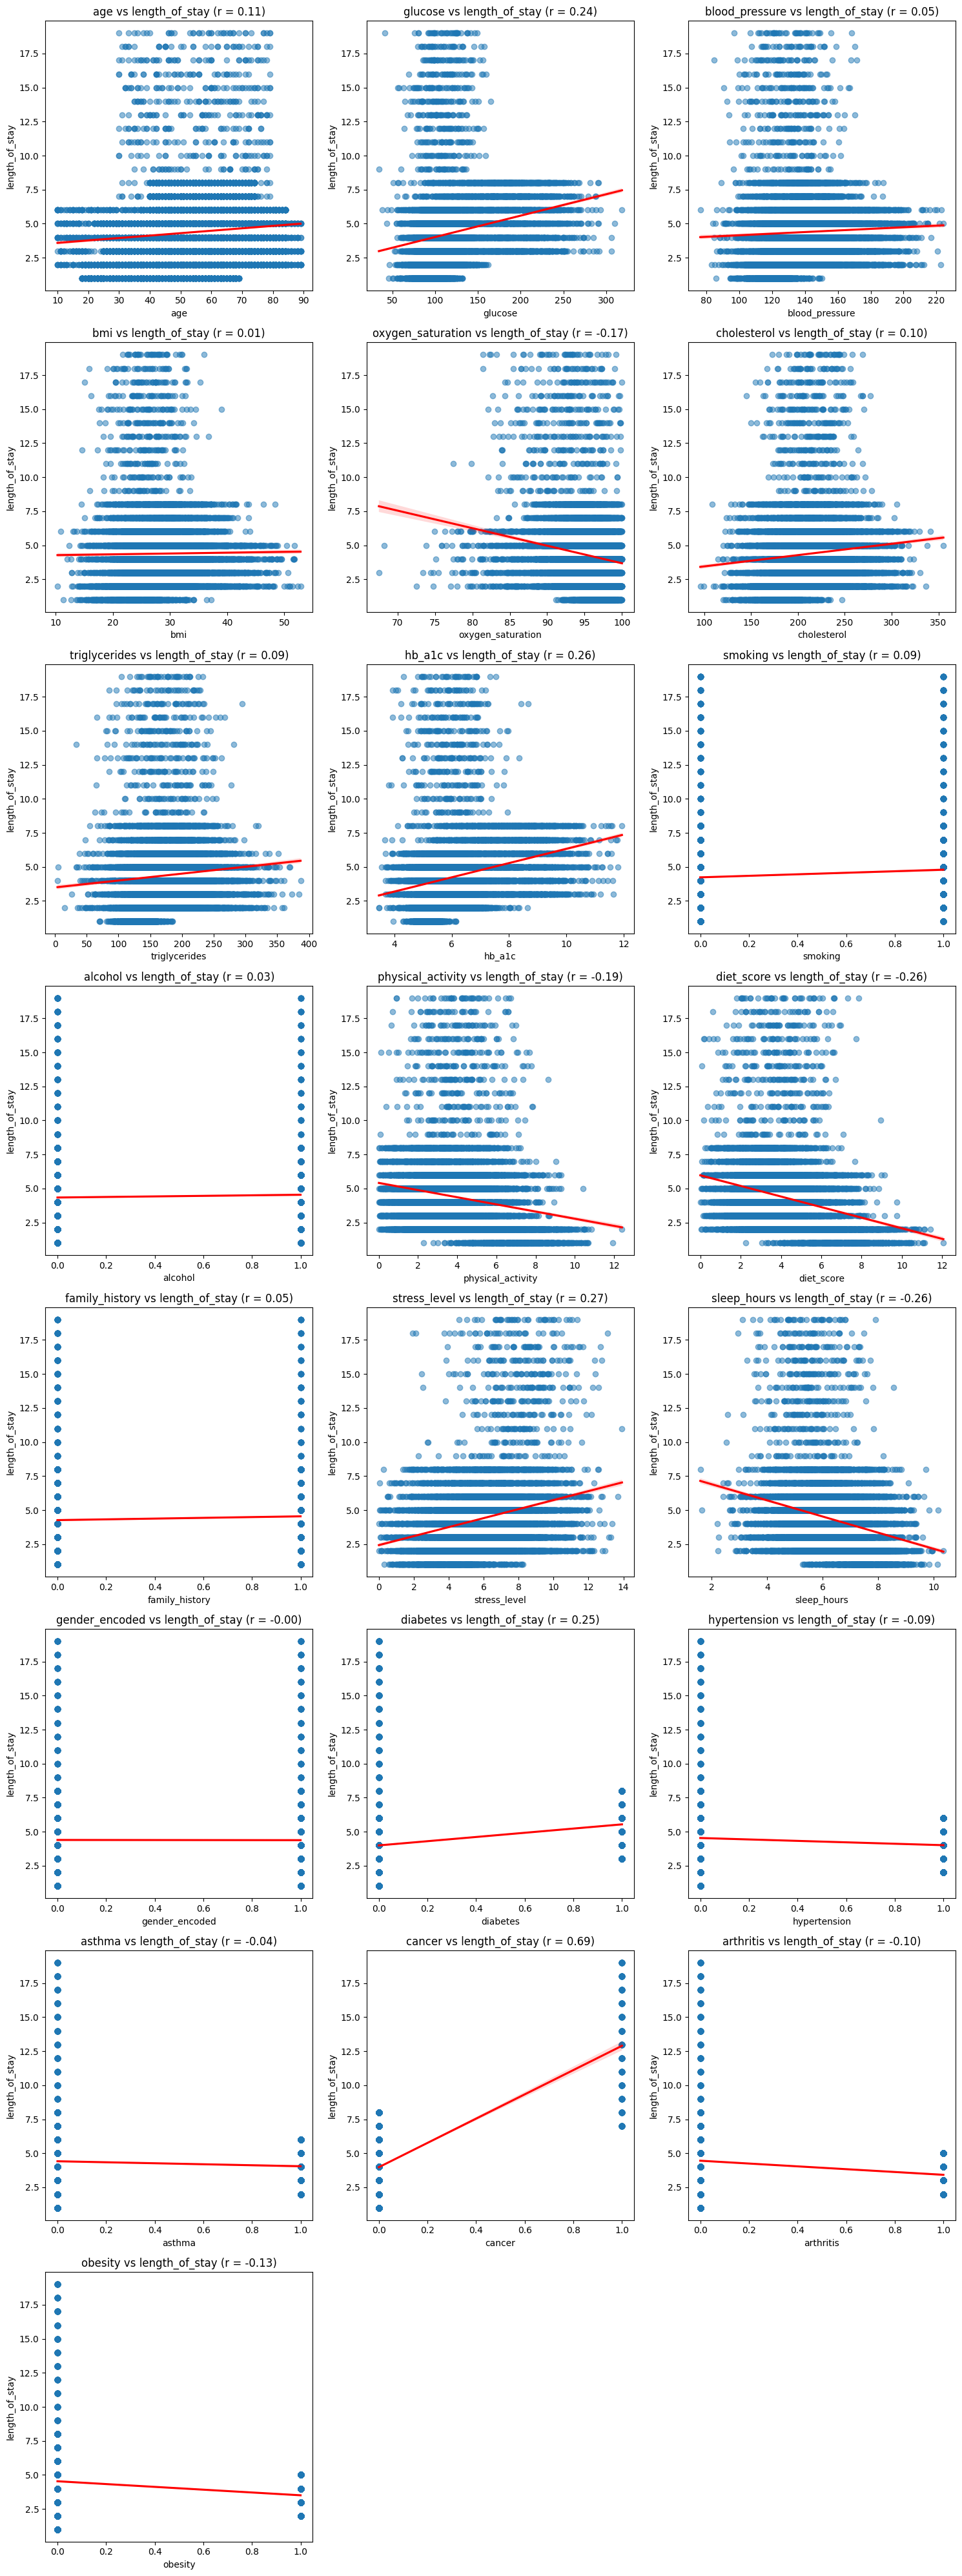

In [188]:
# Identify numeric columns
numeric_cols = clean_records_df.select_dtypes(include=["number"]).columns
target = "length_of_stay"

# Exclude target variable from feature list
features_to_plot = [col for col in numeric_cols if col != target]

# Grid size and layout for scatter plots
n_cols = 3
n_rows = (len(features_to_plot) + n_cols - 1) // n_cols
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
axes = axes.flatten()

for i, col in enumerate(features_to_plot):
    # Calculate correlation coefficient
    r_value = clean_records_df[[col, target]].corr().iloc[0, 1]

    sns.regplot(
        x = col, y = target, data = clean_records_df,
        scatter_kws = {"alpha": 0.5},
        line_kws = {"color": "red"},
        ax = axes[i]
    )
    axes[i].set_title(f"{col} vs {target} (r = {r_value:.2f})", fontsize = 12)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel(target)

# Remove unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

### Prepare for regression by dropping features with weak correlation

In [189]:
drop_cols = [
    "blood_pressure", # 0.05
    "bmi", # 0.01
    "cholesterol", # 0.10
    "triglycerides", # 0.09
    "smoking", # 0.09
    "alcohol", # 0.03
    "family_history", # 0.05
    "gender_encoded", # 0.00
]

reg_records_df = clean_records_df.drop(columns=drop_cols, errors = "ignore")

print("Remaining columns: ", reg_records_df.columns.tolist())
print("Shape after drop: ", reg_records_df.shape)

Remaining columns:  ['age', 'glucose', 'oxygen_saturation', 'length_of_stay', 'hb_a1c', 'physical_activity', 'diet_score', 'stress_level', 'sleep_hours', 'diabetes', 'hypertension', 'asthma', 'cancer', 'arthritis', 'obesity']
Shape after drop:  (12341, 15)


**Regression data frame:** 12341 records, 15 features
* Insignificant features dropped
* Medical conditions maintained for one-hot encoding integrity
* Other features maintained due for real-world insights

## Part 4: **Linear regression model development and evaluation**

### Training and testing a linear regression model

In [190]:
# Define feature and target variables
X = reg_records_df.drop(columns = ["length_of_stay"])
y = reg_records_df["length_of_stay"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

# Fit baseline linear regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predict on test set
y_pred = lr.predict(X_test)

# Define n and p for adjusted r2 calculation
n = len(y)
p = X.shape[1]

# Define accuracy metrics for Linear regression
lin_r2 = r2_score(y_test, y_pred)
lin_adj_r2 = 1 - (1 - lin_r2) * ((n - 1) / (n - p - 1))
lin_mae = mean_absolute_error(y_test, y_pred)
lin_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Evaluate model performance
print("Linear Regression Model Performance:")
print("R2: ", lin_r2)
print("Adjusted R2: ", lin_adj_r2)
print("Mean Absolute Error (MAE): ", lin_mae)
print("Root Mean Squared Error (RMSE): ", lin_rmse)

Linear Regression Model Performance:
R2:  0.6624678152059014
Adjusted R2:  0.6620844426124308
Mean Absolute Error (MAE):  1.2548587305135792
Root Mean Squared Error (RMSE):  1.5709094769422864


### View linear coefficient values for each variable

In [191]:
# Extract coefficients
coefficients_lr = pd.DataFrame({
    "Feature": X.columns,
    "Linear_Coefficient": lr.coef_
}).sort_values(by = "Linear_Coefficient", ascending = False)
print(coefficients_lr) # Display coefficients in sorted order

              Feature  Linear_Coefficient
11             cancer           11.631286
8            diabetes            4.173067
10             asthma            2.675182
9        hypertension            2.609801
13            obesity            2.127754
12          arthritis            2.033651
5          diet_score            0.015381
7         sleep_hours            0.008613
6        stress_level            0.006668
2   oxygen_saturation            0.005477
4   physical_activity            0.000500
1             glucose           -0.000166
0                 age           -0.001728
3              hb_a1c           -0.012994


All medical conditions are strong predictive contributors compared to patient vitals.
**Notable findings:**
* Cancer patients stay almost 12 days longer than healthy patients
* Diabetes patients stay about 4 days longer than healthy patients
* Patients with other conditions stay 2-3 days longer than healthy patients


### Visualize actual values and residuals vs. predicted values for linear model

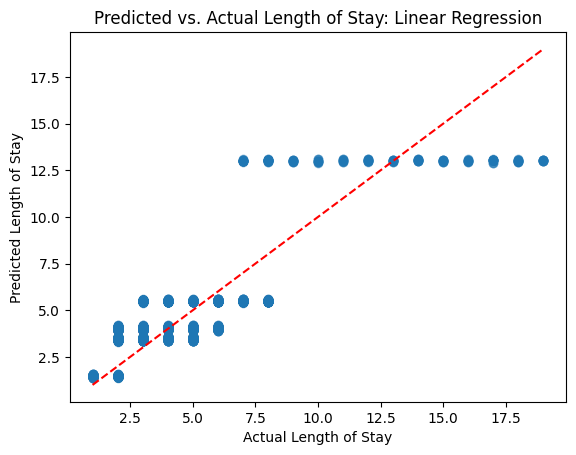

In [192]:
# Predicted vs. Actual Length of Stay
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--")
plt.xlabel("Actual Length of Stay")
plt.ylabel("Predicted Length of Stay")
plt.title("Predicted vs. Actual Length of Stay: Linear Regression")
plt.show()

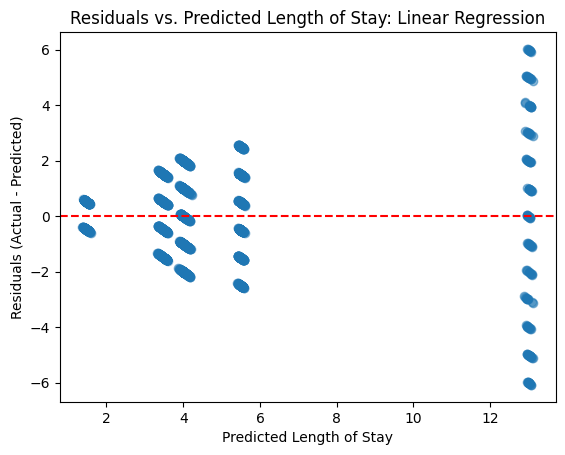

In [193]:
# Plot of residuals to check for model errors
residuals = y_test - y_pred

plt.scatter(y_pred, residuals, alpha = 0.5)
plt.axhline(y = 0, color = "r", linestyle = "--")
plt.xlabel("Predicted Length of Stay")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Residuals vs. Predicted Length of Stay: Linear Regression")
plt.show()

Both the predicted vs. actual and residuals plots indicate little variability in the predicted length of stay values (only 5 distinct values predicted). The model predicts shorter stays, but there is more variation with longer stays. This could be due to nonlinear factors and interactions, will explore further with Random Forest regression.

### Calculate variable inflation factors (VIFs) to diagnose multicollinearity

In [194]:
# Create constant column for VIF calculation
X_const = add_constant(X_train)

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = X_train.columns
vif_data["VIF"] = [
    variance_inflation_factor(X_const.values, i) 
    for i in range(1, X_train.shape[1] + 1)
]
print(vif_data)

              Feature        VIF
0                 age   1.764729
1             glucose   2.720156
2   oxygen_saturation   1.353285
3              hb_a1c   2.513942
4   physical_activity   2.024976
5          diet_score   1.907669
6        stress_level   1.305678
7         sleep_hours   1.298691
8            diabetes  10.814169
9        hypertension   6.217279
10             asthma   2.683669
11             cancer   2.281671
12          arthritis   2.705711
13            obesity   4.901995


`diabetes`, `hypertension`, and `obesity` have higher VIF values, but will not be dropped to maintain one-hot encoding integrity.

### Conduct Ridge and Lasso regularization regressions

Ridge regression performs identically to linear regression.

In [195]:
# Find optimal alpha using RidgeCV
ridge_cv = RidgeCV(alphas = [0.001, 0.01, 0.1, 1, 10, 100], cv = 5)
ridge_cv.fit(X_train, y_train)
print("Optimal alpha for Ridge Regression: ", ridge_cv.alpha_)

# Fit Ridge Regression model with optimal alpha
ridge = Ridge(alpha = ridge_cv.alpha_, random_state = 42)
ridge.fit(X_train, y_train)

y_pred_ridge = ridge.predict(X_test)

# Define accuracy metrics for Ridge Regression
ridge_r2 = r2_score(y_test, y_pred_ridge)
ridge_adj_r2 = 1 - (1 - ridge_r2) * ((n - 1) / (n - p - 1))
ridge_mae = mean_absolute_error(y_test, y_pred_ridge)
ridge_rmse = np.sqrt(mean_squared_error(y_test, y_pred_ridge))

# Evaluate Ridge Regression model performance
print("Ridge Regression Model Performance:")
print("R2: ", ridge_r2)
print("Adjusted R2: ", ridge_adj_r2)
print("Mean Absolute Error (MAE): ", ridge_mae)
print("Root Mean Squared Error (RMSE): ", ridge_rmse)

Optimal alpha for Ridge Regression:  0.01
Ridge Regression Model Performance:
R2:  0.6624709246614251
Adjusted R2:  0.6620875555997068
Mean Absolute Error (MAE):  1.2548550704306494
Root Mean Squared Error (RMSE):  1.5709022410628353


Lasso regression performs marginally better than linear regression, but not enough to replace it with a linear model if aiming for simplicity.

In [196]:
# Find optimal alpha using LassoCV
lasso_cv = LassoCV(alphas = [0.001, 0.01, 0.1, 1, 10, 100], cv = 5)
lasso_cv.fit(X_train, y_train)
print("Optimal alpha for Lasso Regression: ", lasso_cv.alpha_)

# Lasso regression model
lasso = Lasso(alpha = lasso_cv.alpha_, random_state = 42)
lasso.fit(X_train, y_train)

y_pred_lasso = lasso.predict(X_test)

# Define accuracy metrics for Lasso Regression
lasso_r2 = r2_score(y_test, y_pred_lasso)
lasso_adj_r2 = 1 - (1 - lasso_r2) * ((n - 1) / (n - p - 1))
lasso_mae = mean_absolute_error(y_test, y_pred_lasso)
lasso_rmse = np.sqrt(mean_squared_error(y_test, y_pred_lasso))

# Evaluate Lasso Regression model performance
print("Lasso Regression Model Performance:")
print("R2: ", lasso_r2)
print("Adjusted R2: ", lasso_adj_r2)
print("Mean Absolute Error (MAE): ", lasso_mae)
print("Root Mean Squared Error (RMSE): ", lasso_rmse)

Optimal alpha for Lasso Regression:  0.001
Lasso Regression Model Performance:
R2:  0.6627676997433094
Adjusted R2:  0.6623846677618399
Mean Absolute Error (MAE):  1.2543277015552674
Root Mean Squared Error (RMSE):  1.5702114751423684


## Part 5: **Random Forest regression model development and evaluation**

The Random Forest model performs slightly worse than the Linear model. 

In [198]:
# Initialize and fit RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 100, max_depth = None, random_state = 42)

# Fit the model against data without dropping columns
X = clean_records_df.drop(columns = ["length_of_stay"])
y = clean_records_df["length_of_stay"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Define n and p for adjusted r2 calculation
n = len(y)
p = X.shape[1]

# Define accuracy metrics for Random Forest Regression
rf_r2 = r2_score(y_test, y_pred_rf)
rf_adj_r2 = 1 - (1 - rf_r2) * ((n - 1) / (n - p - 1))
rf_mae = mean_absolute_error(y_test, y_pred_rf)
rf_rmse = np.sqrt(mean_squared_error(y_test, y_pred_rf))

print("Random Forest Regression Model Performance:")
print("R2: ", rf_r2)
print("Adjusted R2: ", rf_adj_r2)
print("Mean Absolute Error (MAE): ", rf_mae)
print("Root Mean Squared Error (RMSE): ", rf_rmse)


Random Forest Regression Model Performance:
R2:  0.650572396849997
Adjusted R2:  0.6499483176756748
Mean Absolute Error (MAE):  1.268009721847151
Root Mean Squared Error (RMSE):  1.5983510440298747


### View feature importances

In [199]:
# Extract feature importances
importances_rf = pd.DataFrame({
    "Feature": X_train.columns,
    "RF_Importance": rf.feature_importances_
}).sort_values(by = "RF_Importance", ascending = False)
print(importances_rf)

              Feature  RF_Importance
19             cancer       0.478637
16           diabetes       0.113070
10  physical_activity       0.052173
11         diet_score       0.046383
14        sleep_hours       0.031959
5         cholesterol       0.028542
2      blood_pressure       0.028505
4   oxygen_saturation       0.028442
6       triglycerides       0.027001
3                 bmi       0.026643
1             glucose       0.025664
7              hb_a1c       0.025596
13       stress_level       0.025238
0                 age       0.020865
17       hypertension       0.013688
18             asthma       0.013431
8             smoking       0.003342
15     gender_encoded       0.003086
12     family_history       0.002930
9             alcohol       0.002887
20          arthritis       0.001764
21            obesity       0.000151


Beyond `cancer` and `diabetes`, the top feature importances for the Random Forest model are all patient vitals. This differs from the Linear model, which relied more on medical conditions.

### Visualize actual values and residuals vs. predicted values for Random Forest model

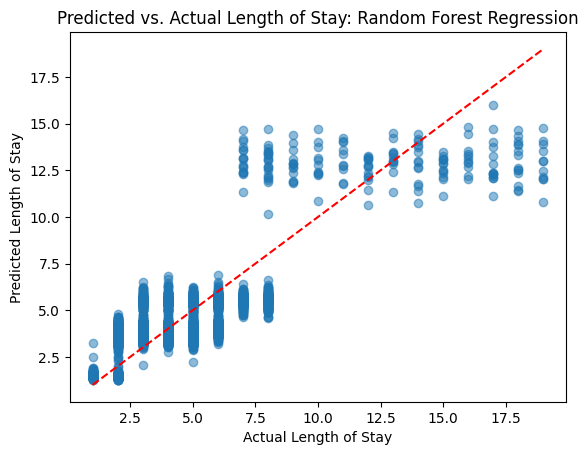

In [200]:
# Predicted vs. Actual Length of Stay
plt.scatter(y_test, y_pred_rf, alpha = 0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--")
plt.xlabel("Actual Length of Stay")
plt.ylabel("Predicted Length of Stay")
plt.title("Predicted vs. Actual Length of Stay: Random Forest Regression")
plt.show()

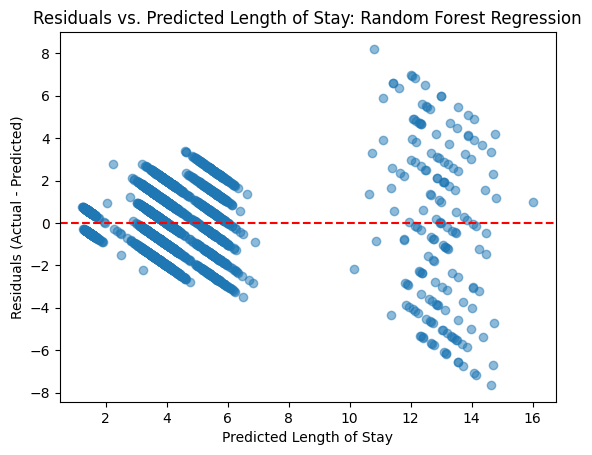

In [201]:
# Plot of residuals to check for model errors
residuals_rf = y_test - y_pred_rf

plt.scatter(y_pred_rf, residuals_rf, alpha = 0.5)
plt.axhline(y = 0, color = "r", linestyle = "--")
plt.xlabel("Predicted Length of Stay")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Residuals vs. Predicted Length of Stay: Random Forest Regression")
plt.show()

As expected, the Random Forest model provides a wider variability (more distinct values predicted), but also have higher variation in predicted values compared to the linear model.

## Part 6: **Compare models and summarize findings**

### Visualize linear coefficients and random forest feature importances

In [202]:
# For linear coefficients, convert to absolute values for feature influence comparison
coefficients_lr["Abs_Coefficient"] = coefficients_lr["Linear_Coefficient"].abs()

# Combine all coefficients into a single DataFrame
comparison_df = coefficients_lr.merge(importances_rf, on = "Feature", how = "outer")
comparison_df = comparison_df.sort_values(by = "Abs_Coefficient", ascending = False)
print(comparison_df.head(10))


         Feature  Linear_Coefficient  Abs_Coefficient  RF_Importance
6         cancer           11.631286        11.631286       0.478637
8       diabetes            4.173067         4.173067       0.113070
3         asthma            2.675182         2.675182       0.013431
14  hypertension            2.609801         2.609801       0.013688
15       obesity            2.127754         2.127754       0.000151
2      arthritis            2.033651         2.033651       0.001764
9     diet_score            0.015381         0.015381       0.046383
13        hb_a1c           -0.012994         0.012994       0.025596
18   sleep_hours            0.008613         0.008613       0.031959
20  stress_level            0.006668         0.006668       0.025238


### Observe top 10 linear predictors compared to their Random Forest values

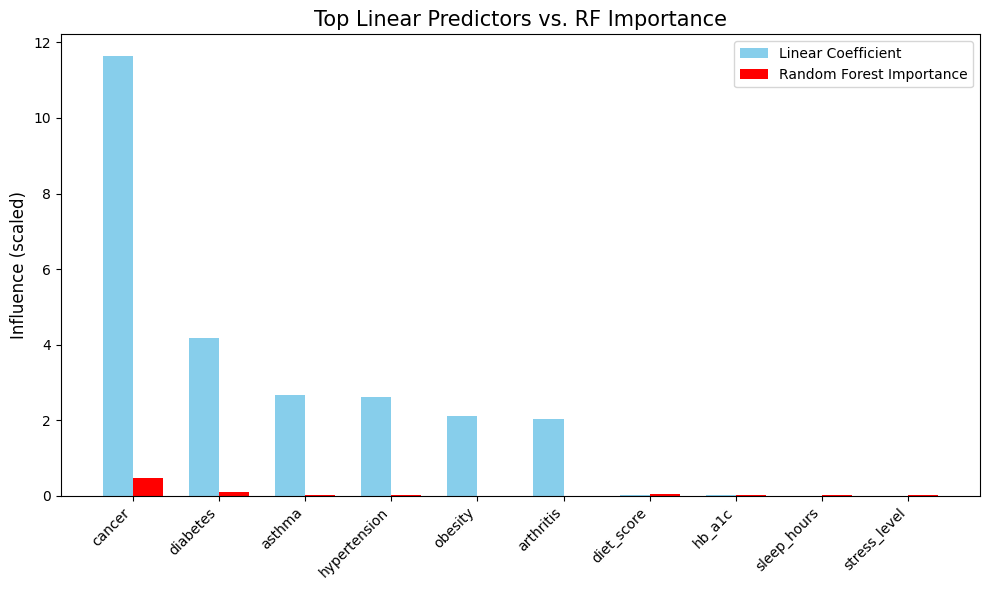

In [203]:
# Display top 10 features based on absolute coefficient (linear) values
x = np.arange(len(comparison_df.head(10)))
width = 0.35

plt.figure(figsize = (10, 6))
plt.bar(x - width/2, comparison_df.head(10)["Abs_Coefficient"], width, label = "Linear Coefficient", color = "skyblue")
plt.bar(x + width/2, comparison_df.head(10)["RF_Importance"], width, label = "Random Forest Importance", color = "red")

plt.xticks(x, comparison_df.head(10)["Feature"], rotation = 45, ha = "right")
plt.ylabel("Influence (scaled)", size = 12)
plt.title("Top Linear Predictors vs. RF Importance", size = 15)
plt.legend()
plt.tight_layout()
plt.show()

Both `cancer` and `diabetes` are strong predictors for both models. This graph highlights Linear regression's overall emphasis on medical conditions and Random Forest regression's marginal but greater focus on patient vitals.

### Observe top predictors across both models

In [204]:
top_linear = comparison_df.nlargest(10, "Abs_Coefficient")["Feature"]
top_rf = comparison_df.nlargest(10, "RF_Importance")["Feature"]
union_features = pd.concat([top_linear, top_rf]).drop_duplicates().tolist()

# Filter dataframe to union set
union_df = comparison_df[comparison_df["Feature"].isin(union_features)]
print(union_df)

              Feature  Linear_Coefficient  Abs_Coefficient  RF_Importance
6              cancer           11.631286        11.631286       0.478637
8            diabetes            4.173067         4.173067       0.113070
3              asthma            2.675182         2.675182       0.013431
14       hypertension            2.609801         2.609801       0.013688
15            obesity            2.127754         2.127754       0.000151
2           arthritis            2.033651         2.033651       0.001764
9          diet_score            0.015381         0.015381       0.046383
13             hb_a1c           -0.012994         0.012994       0.025596
18        sleep_hours            0.008613         0.008613       0.031959
20       stress_level            0.006668         0.006668       0.025238
16  oxygen_saturation            0.005477         0.005477       0.028442
17  physical_activity            0.000500         0.000500       0.052173
4      blood_pressure                 

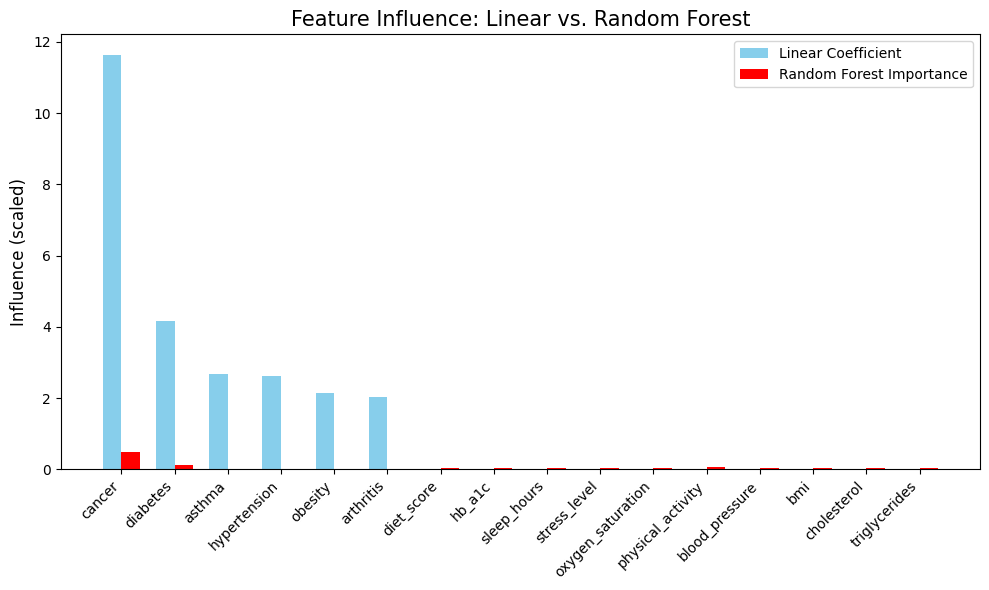

In [205]:
# Graph union of top features across both models
x = np.arange(len(union_df))
width = 0.35

plt.figure(figsize = (10, 6))
plt.bar(x - width/2, union_df["Abs_Coefficient"], width, label = "Linear Coefficient", color = "skyblue")
plt.bar(x + width/2, union_df["RF_Importance"], width, label = "Random Forest Importance", color = "red")

plt.xticks(x, union_df["Feature"], rotation = 45, ha = "right")
plt.ylabel("Influence (scaled)", size = 12)
plt.title("Feature Influence: Linear vs. Random Forest", size = 15)
plt.legend(loc = 'upper right')
plt.tight_layout()
plt.show()

The union graph further explores and validates the above trend.

### Summarize and compare model performances

In [207]:
model_summary = pd.DataFrame({
    "Regression Model": ["Linear", "Ridge", "Lasso", "Random Forest"],
    "R2 Value": [lin_r2, ridge_r2, lasso_r2, rf_r2],
    "Adjusted R2 Value": [lin_adj_r2, ridge_adj_r2, lasso_adj_r2, rf_adj_r2],
    "Mean Absolute Error": [lin_mae, ridge_mae, lasso_mae, rf_mae],
    "Root Mean Squared Error": [lin_rmse, ridge_rmse, lasso_rmse, rf_rmse]
})
print(model_summary.round(4))

  Regression Model  R2 Value  Adjusted R2 Value  Mean Absolute Error  \
0           Linear    0.6625             0.6621               1.2549   
1            Ridge    0.6625             0.6621               1.2549   
2            Lasso    0.6628             0.6624               1.2543   
3    Random Forest    0.6506             0.6499               1.2680   

   Root Mean Squared Error  
0                   1.5709  
1                   1.5709  
2                   1.5702  
3                   1.5984  


Based on accuracy metrics, **Linear or Lasso regression models** would provide the strongest predictive power for length of hospital stay.